In [254]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import svm # Support Vector Machine
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime, timedelta



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

df = pd.read_csv('../input/hourly-energy-consumption/AEP_hourly.csv')



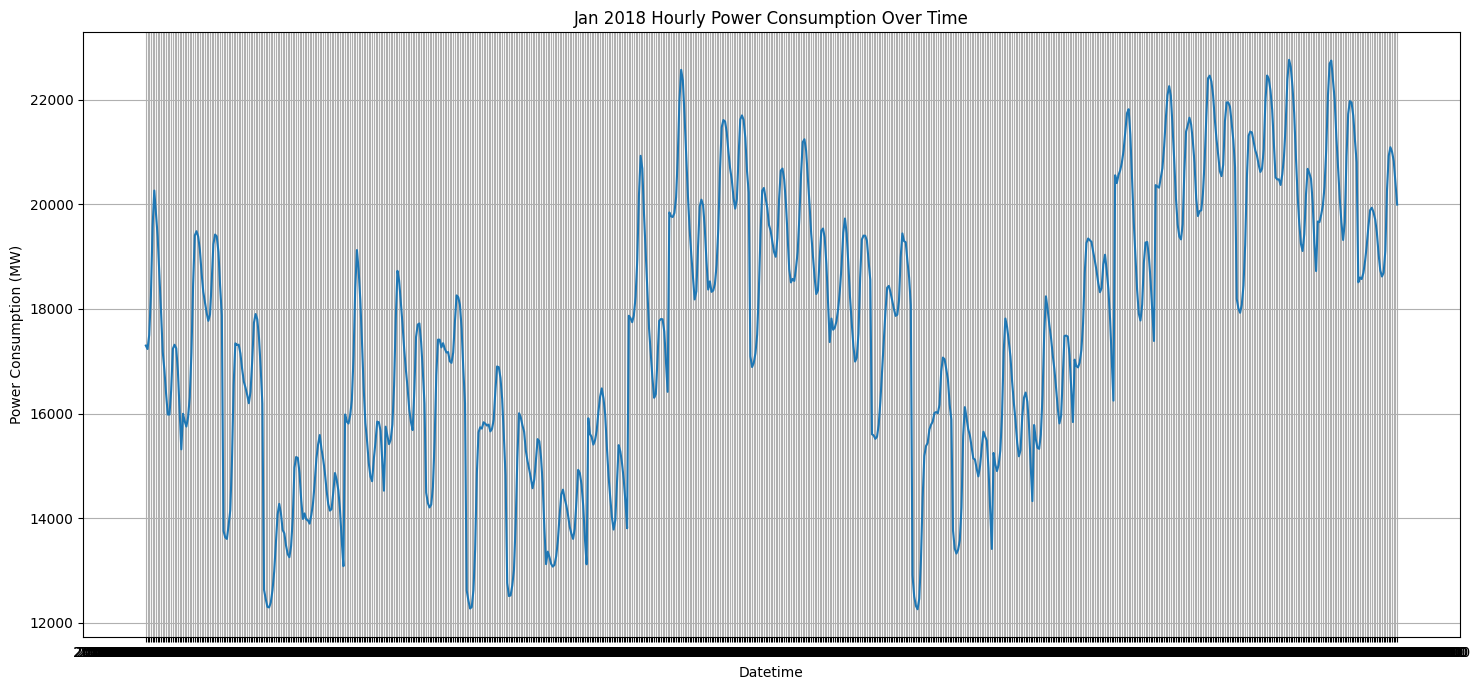

In [189]:
# Print the graph for better visualization Jan 2018
plt.figure(figsize=(15, 7))
plt.plot(df['Datetime'][120531:121275], df['AEP_MW'][120531:121275])
plt.title('Jan 2018 Hourly Power Consumption Over Time')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption (MW)')
plt.grid(True)
plt.tight_layout()
# This saves the figure in the Output folder
plt.savefig('2018_Jan.png') 
plt.show()

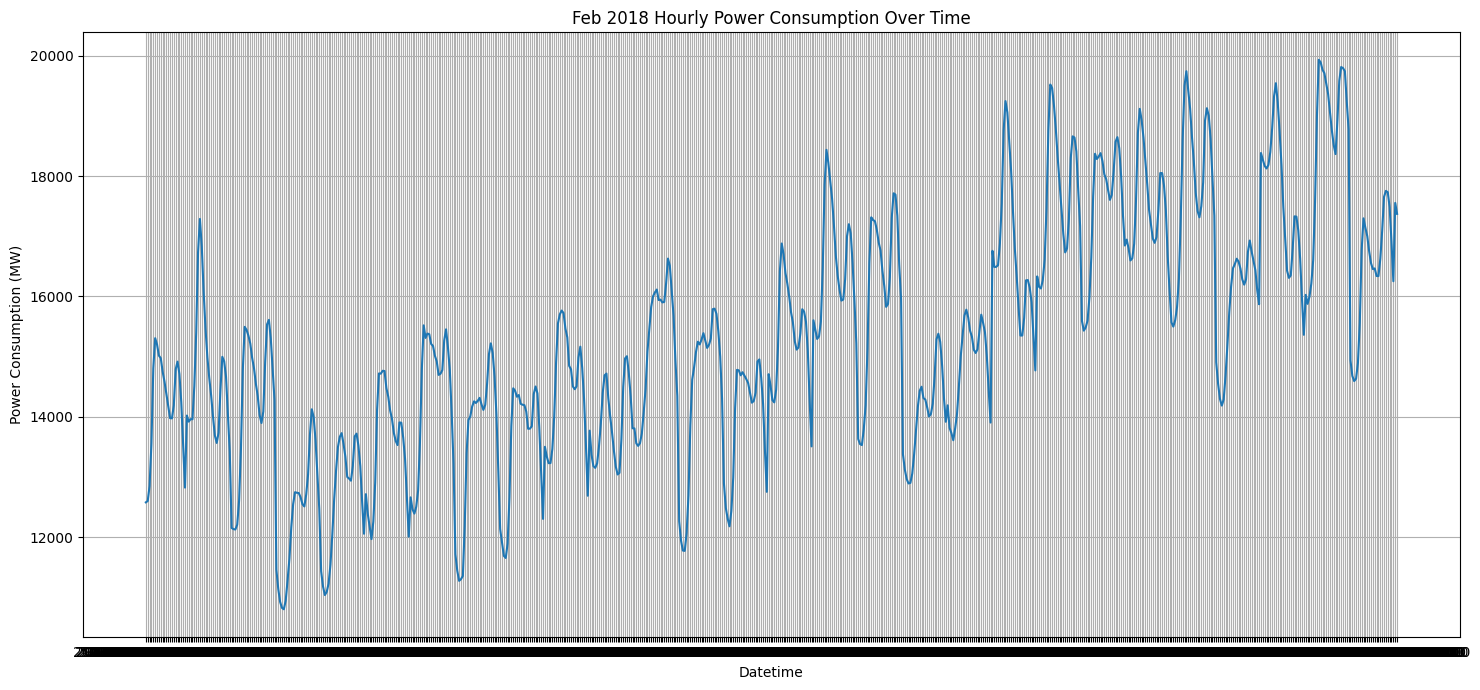

In [190]:
# Print the graph for better visualization Feb 2018
plt.figure(figsize=(15, 7))
plt.plot(df['Datetime'][119859:120531], df['AEP_MW'][119859:120531])
plt.title('Feb 2018 Hourly Power Consumption Over Time')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption (MW)')
plt.grid(True)
plt.tight_layout()
# This saves the figure in the Output folder
plt.savefig('2018_Feb.png') 
plt.show()

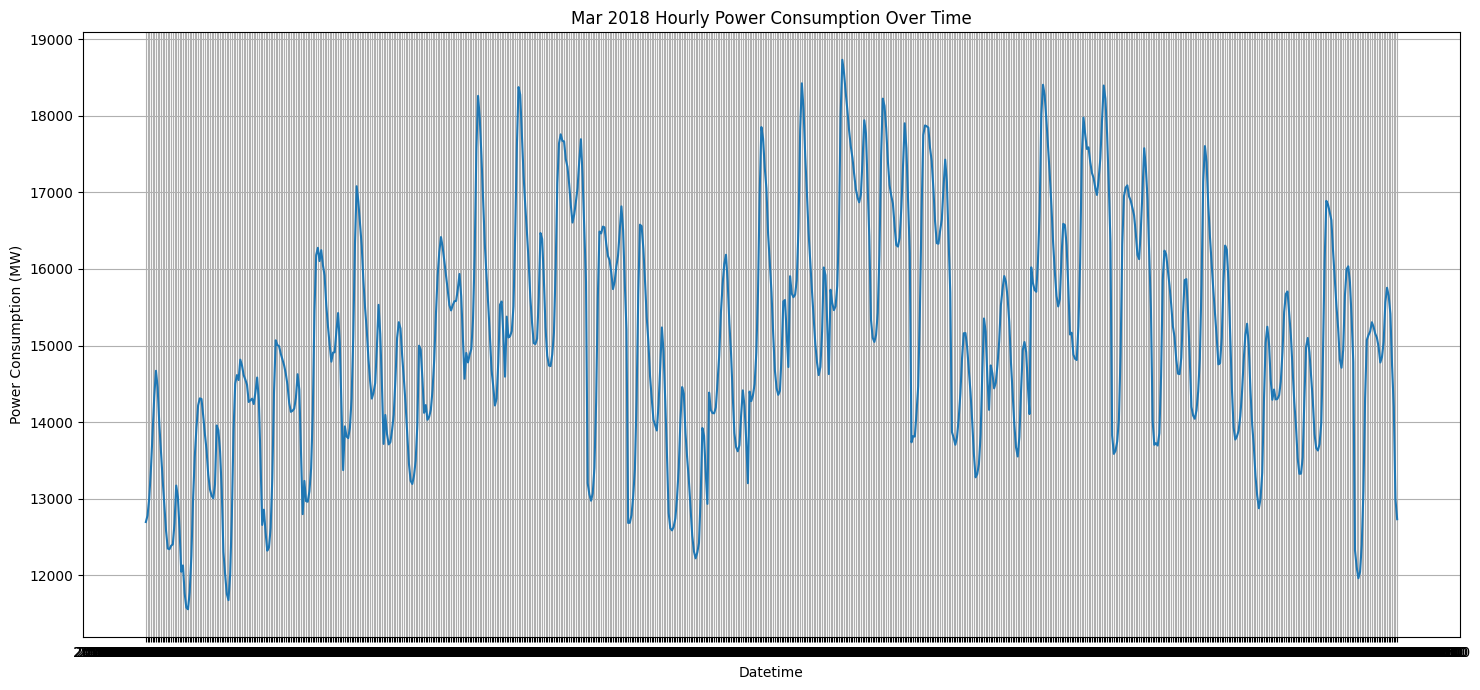

In [191]:
# Print the graph for better visualization Mar 2018
plt.figure(figsize=(15, 7))
plt.plot(df['Datetime'][119116:119859], df['AEP_MW'][119116:119859])
plt.title('Mar 2018 Hourly Power Consumption Over Time')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption (MW)')
plt.grid(True)
plt.tight_layout()
# This saves the figure in the Output folder
plt.savefig('2018_Mar.png') 
plt.show()

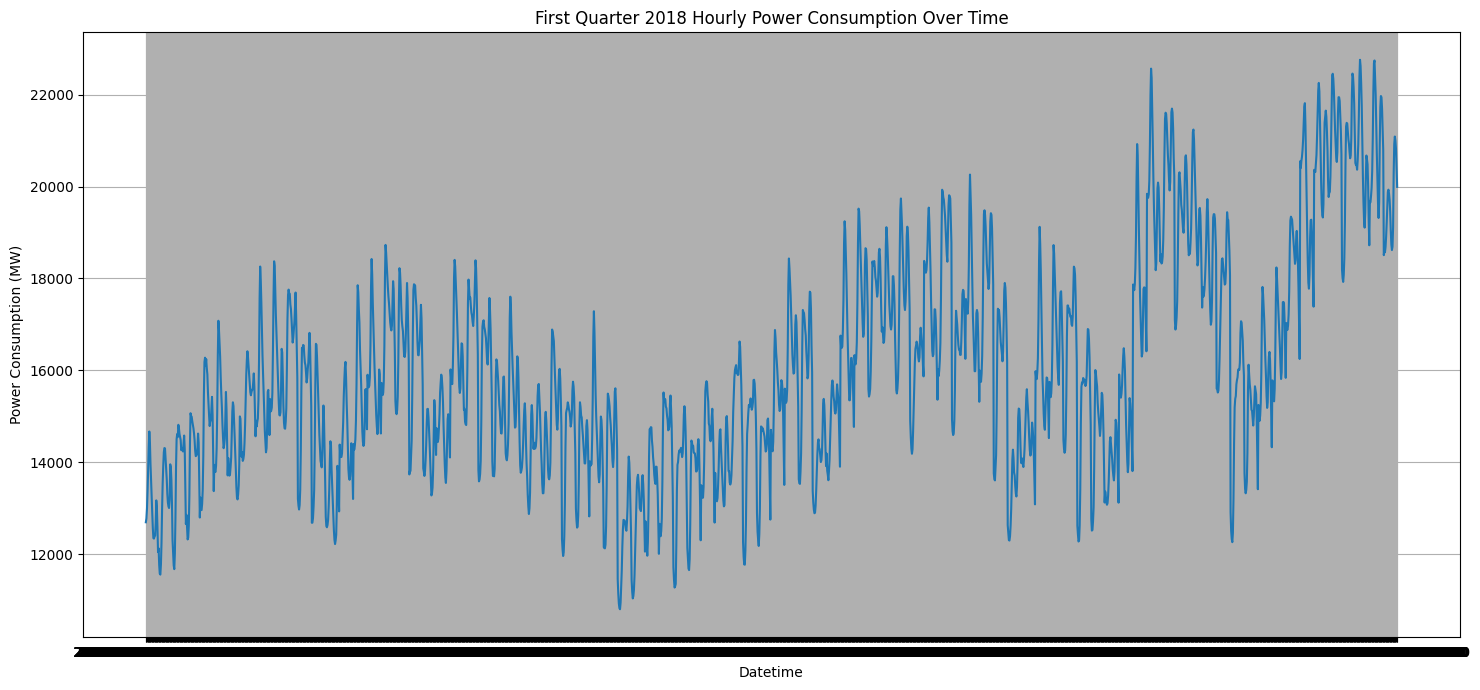

In [192]:
# Print the graph for better visualization First Quarter 2018
plt.figure(figsize=(15, 7))
plt.plot(df['Datetime'][119116:121275], df['AEP_MW'][119116:121275])
plt.title('First Quarter 2018 Hourly Power Consumption Over Time')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption (MW)')
plt.grid(True)
plt.tight_layout()
# This saves the figure in the Output folder
plt.savefig('2018_Q1.png') 
plt.show()

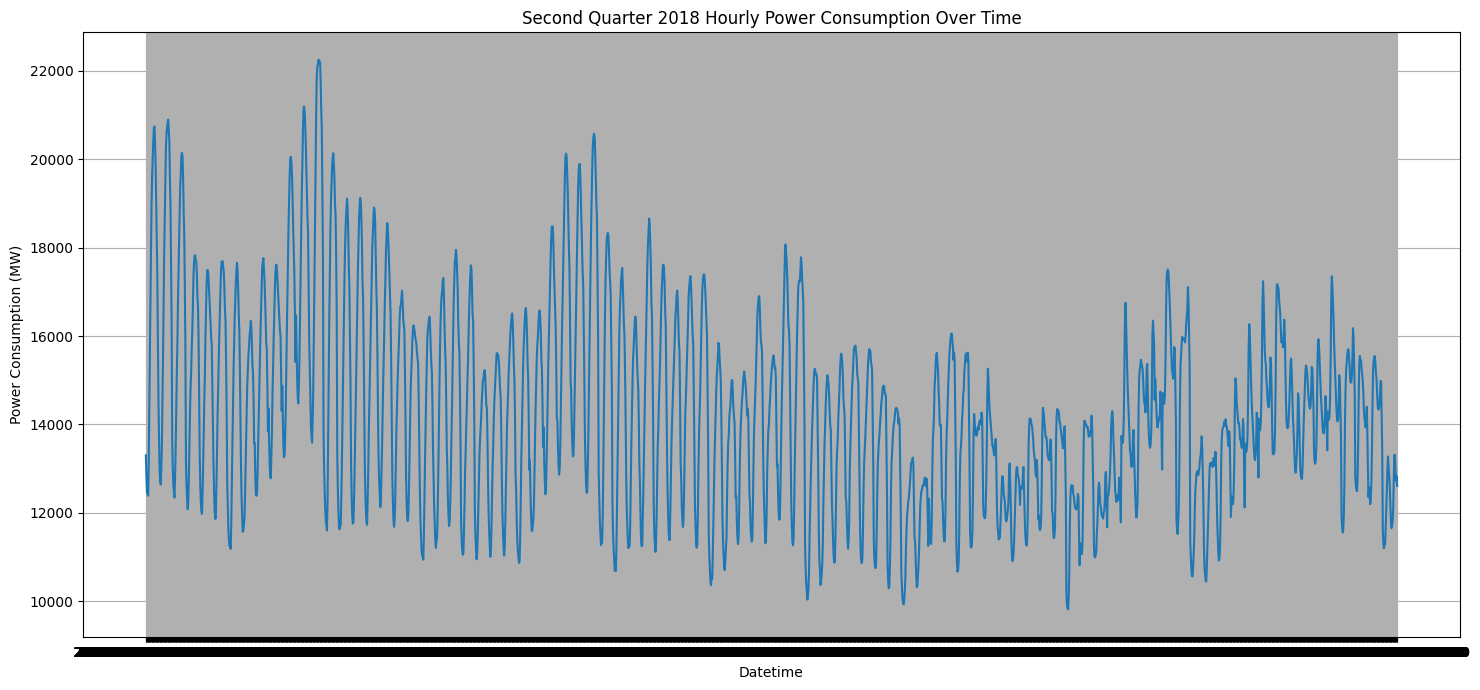

In [193]:
# Print the graph for better visualization Second Quarter 2018
plt.figure(figsize=(15, 7))
plt.plot(df['Datetime'][116932:119116], df['AEP_MW'][116932:119116])
plt.title('Second Quarter 2018 Hourly Power Consumption Over Time')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption (MW)')
plt.grid(True)
plt.tight_layout()
# This saves the figure in the Output folder
plt.savefig('2018_Q2.png') 
plt.show()

In [194]:
# 2D input
X = np.arange(1, 745, dtype=int).reshape(-1, 1)
print('size:', X.size)
# print(X)

size: 744


In [195]:
# Extract the Y values and format it as a numpy array - 2018 Jan

# Define the path to your CSV file
file_path = "../input/hourly-energy-consumption/AEP_hourly.csv"

# List to store extracted numbers
numbers = []

# Read the file line by line
with open(file_path, 'r') as f:
    for idx, line in enumerate(f, start=1):  # idx will keep track of line number, starting from 1
        if 120531 <= idx <= 121274:  # Check if the line number is between 1000 and 2000
            # Split the line by comma and take the second part, then convert to float
            number = float(line.split(",")[1])
            numbers.append(number)

# Convert list to numpy array
Y = np.array(numbers)

print('size:', Y.size)
# print(Y)

size: 744


In [196]:
# Jan 2018 data
regr = svm.SVR()
regr.fit(X, Y)
regr.predict([[800]])

array([17726.19208698])

In [197]:
# Compare with actual data 2018 Feb
# Extract the Y values and format it as a numpy array

# Define the path to your CSV file
file_path = "../input/hourly-energy-consumption/AEP_hourly.csv"

# List to store extracted numbers
numbers = []

# Read the file line by line
with open(file_path, 'r') as f:
    for idx, line in enumerate(f, start=1):  # idx will keep track of line number, starting from 1
        if 119859 <= idx <= 120530:  # Feb 2018 Data
            # Split the line by comma and take the second part, then convert to float
            number = float(line.split(",")[1])
            numbers.append(number)

# Convert list to numpy array
Y_feb_actual = np.array(numbers)

print('size:', Y_feb_actual.size)
# print(Y_feb_actual)

size: 672


In [198]:
# Test the prediction against actual 2018 Feb data - Support Vector Regression
error = 0
percentage_error = 0
for i in range(0, 672, 1):
    error += abs(Y_feb_actual[i] - Y[i])
    percentage_error += abs(100 * (Y_feb_actual[i] - Y[i]) / Y_feb_actual[i])
error /= 744
percentage_error /= 744
print('mean error for February data:', error)
print('percentage off for February data:', percentage_error)

mean error for February data: 2362.0685483870966
percentage off for February data: 15.847123897894056


In [199]:
# Support Vector Regression using data from the first quarter 2018
# 2D input
X = np.arange(1, 2160, dtype=int).reshape(-1, 1)
print('size:', X.size)

size: 2159


In [200]:
# Extract the Y values and format it as a numpy array - 2018 Q1

# Define the path to your CSV file
file_path = "../input/hourly-energy-consumption/AEP_hourly.csv"

# List to store extracted numbers
numbers = []

# Read the file line by line
with open(file_path, 'r') as f:
    for idx, line in enumerate(f, start=1):  # idx will keep track of line number, starting from 1
        if 119116 <= idx <= 121274:  # Check if the line number is between 1000 and 2000
            # Split the line by comma and take the second part, then convert to float
            number = float(line.split(",")[1])
            numbers.append(number)

# Convert list to numpy array
Y = np.array(numbers)

print('size:', Y.size)

size: 2159


In [201]:
# Compare with actual data - Q1 2017
# Extract the Y values and format it as a numpy array

# Define the path to your CSV file
file_path = "../input/hourly-energy-consumption/AEP_hourly.csv"

# List to store extracted numbers
numbers = []

# Read the file line by line
with open(file_path, 'r') as f:
    for idx, line in enumerate(f, start=1):  # idx will keep track of line number, starting from 1
        if 113981 <= idx <= 116139:  # Feb 2018 Data
            # Split the line by comma and take the second part, then convert to float
            number = float(line.split(",")[1])
            numbers.append(number)

# Convert list to numpy array
Y_Q1_2017_actual = np.array(numbers)

print('size:', Y_Q1_2017_actual.size)


size: 2159


In [202]:
# Regression using 2018 Q1 to predict 2017 Q1
regr = svm.SVR()
regr.fit(X, Y)

SVR()

In [203]:
# Test the prediction against actual Q1 2017 data - Support Vector Regression
error = 0
percentage_error = 0
for i in range(0, 2159, 1):
    error += abs(Y_Q1_2017_actual[i] - Y[i])
    percentage_error += abs(100 * (Y_Q1_2017_actual[i] - Y[i]) / Y_Q1_2017_actual[i])
error /= 2159
percentage_error /= 2159
print('mean error for 2017 Q1 data:', error)
print('percentage off for 2017 Q1 data:', percentage_error)

mean error for 2017 Q1 data: 1907.5428439092173
percentage off for 2017 Q1 data: 13.12826643389135


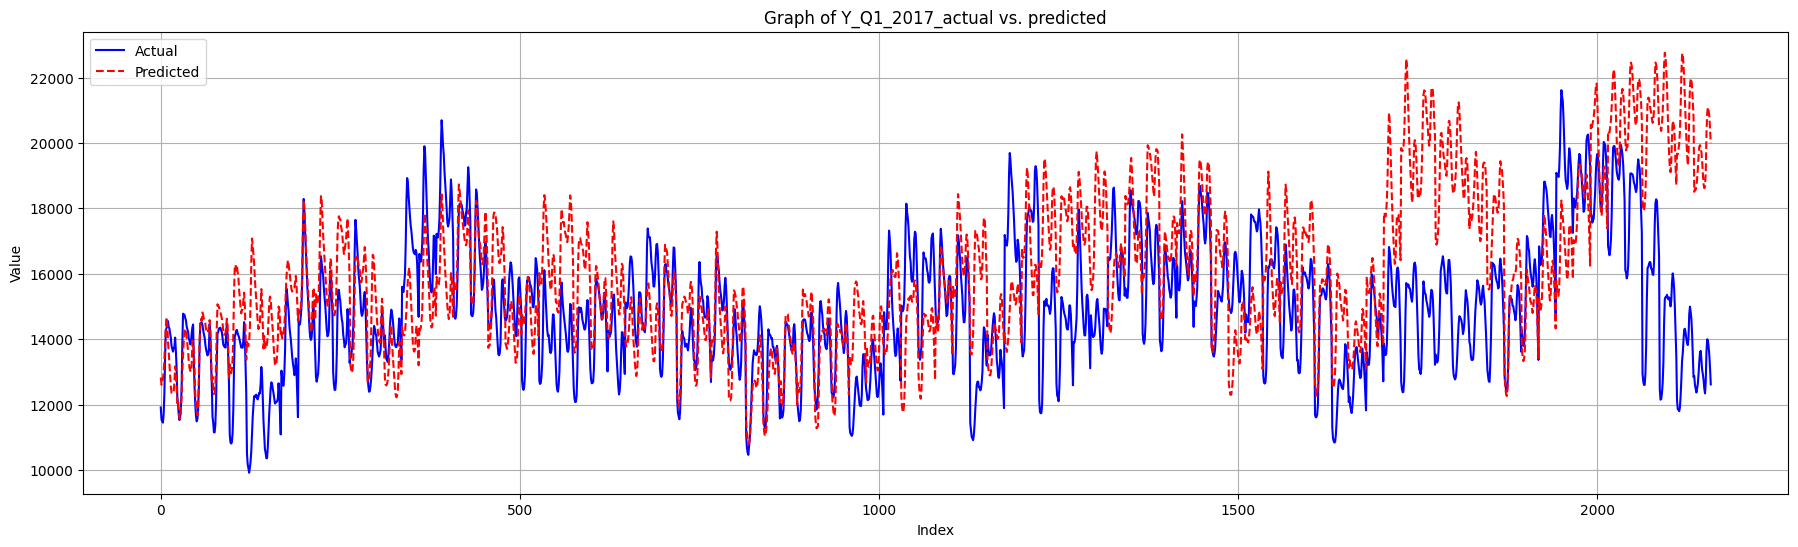

In [204]:
# Graph prediction of 2017 Q1

# Plotting
plt.figure(figsize=(22, 6))  # Here, the width is set to 12 inches and height is set to 6 inches. Adjust as needed.

plt.plot(Y_Q1_2017_actual, label='Actual', color='blue')
plt.plot(Y, label='Predicted', color='red', linestyle='--')


# Customize the graph
plt.title('Graph of Y_Q1_2017_actual vs. predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.savefig('2017_Q1_prediction vs actual.png') 
plt.show()

In [205]:
# Compare with actual data - Q1 2016
# Extract the Y values and format it as a numpy array

# Define the path to your CSV file
file_path = "../input/hourly-energy-consumption/AEP_hourly.csv"

# List to store extracted numbers
numbers = []

# Read the file line by line
with open(file_path, 'r') as f:
    for idx, line in enumerate(f, start=1):  # idx will keep track of line number, starting from 1
        if 105197 <= idx <= 107379:  # Feb 2016 Data
            # Split the line by comma and take the second part, then convert to float
            number = float(line.split(",")[1])
            numbers.append(number)

# Convert list to numpy array
Y_Q1_2016_actual = np.array(numbers)

print('size:', Y_Q1_2016_actual.size)

size: 2183


In [206]:
# Test the prediction against actual Q1 2016 data - Support Vector Regression
error = 0
percentage_error = 0
for i in range(0, 2159, 1):
    error += abs(Y_Q1_2016_actual[i] - Y[i])
    percentage_error += abs(100 * (Y_Q1_2016_actual[i] - Y[i]) / Y_Q1_2016_actual[i])
error /= 2159
percentage_error /= 2159
print('mean error for 2016 Q1 data:', error)
print('percentage off for 2016 Q1 data:', percentage_error)

mean error for 2016 Q1 data: 2339.049559981473
percentage off for 2016 Q1 data: 15.5566222245229


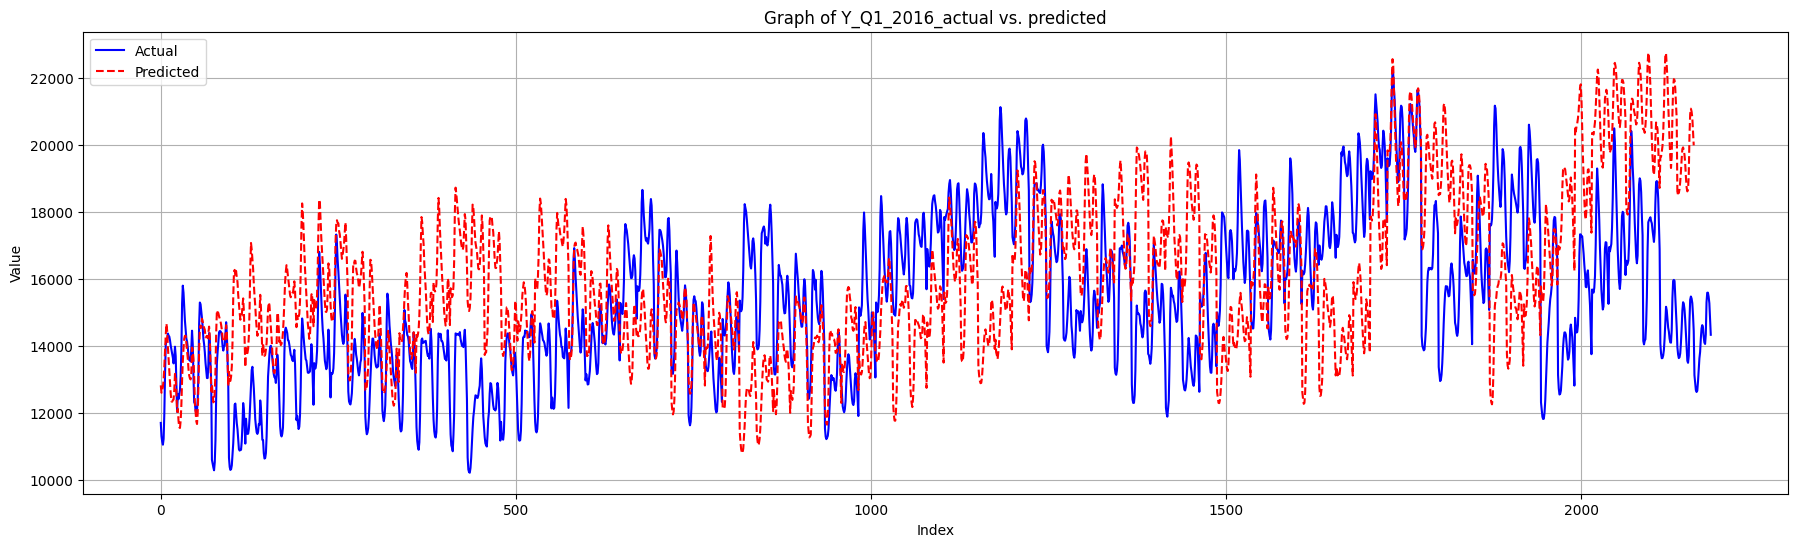

In [207]:
# Graph prediction of 2016 Q1

# Plotting
plt.figure(figsize=(22, 6))  # Here, the width is set to 12 inches and height is set to 6 inches. Adjust as needed.

plt.plot(Y_Q1_2016_actual, label='Actual', color='blue')
plt.plot(Y, label='Predicted', color='red', linestyle='--')


# Customize the graph
plt.title('Graph of Y_Q1_2016_actual vs. predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.savefig('2016_Q1_prediction vs actual.png') 
plt.show()

In [208]:
# SVM: Extract the Y values and format it as a numpy array - 2018 Q1

# Define the path to your CSV file
file_path = "../input/hourly-energy-consumption/AEP_hourly.csv"

# List to store extracted numbers
numbers = []

# Read the file line by line
with open(file_path, 'r') as f:
    for idx, line in enumerate(f, start=1):  # idx will keep track of line number, starting from 1
        if 119116 <= idx <= 121274:  # Check if the line number is between 1000 and 2000
            # Split the line by comma and take the second part, then convert to float
            number = float(line.split(",")[1])
            numbers.append(number)

# Convert list to numpy array
Y = np.array(numbers)
new_Y = np.array([np.mean(Y[i:i+10]) for i in range(0, len(Y), 10)])

print('size of the old array:', Y.size)
print('size of the new SMA array:', new_Y.size)

size of the old array: 2159
size of the new SMA array: 216


In [209]:
# 2D input
X = np.arange(1, 217, dtype=int).reshape(-1, 1)
print('size:', X.size)
# print(X)

size: 216


In [210]:
# Run the regression using SMA
regr = svm.SVR()
regr.fit(X, new_Y)

SVR()

In [211]:
# SMA of average Q1 2017 data
new_Y_Q1_2017_actual = np.array([np.mean(Y_Q1_2017_actual[i:i+10]) for i in range(0, len(Y), 10)])
print('size of SMA 2017 Q1 actual:', new_Y_Q1_2017_actual.size)

size of SMA 2017 Q1 actual: 216


In [212]:
# Test the prediction against actual Q1 2017 data - Support Vector Regression
error = 0
percentage_error = 0
for i in range(0, 216, 1):
    error += abs(new_Y_Q1_2017_actual[i] - Y[i])
    percentage_error += abs(100 * (new_Y_Q1_2017_actual[i] - new_Y[i]) / new_Y_Q1_2017_actual[i])
error /= 216
percentage_error /= 216
print('mean error for SMA 2017 Q1 data:', error)
print('percentage off for SMA 2017 Q1 data:', percentage_error)

mean error for SMA 2017 Q1 data: 1504.1831275720174
percentage off for SMA 2017 Q1 data: 12.17973218416388


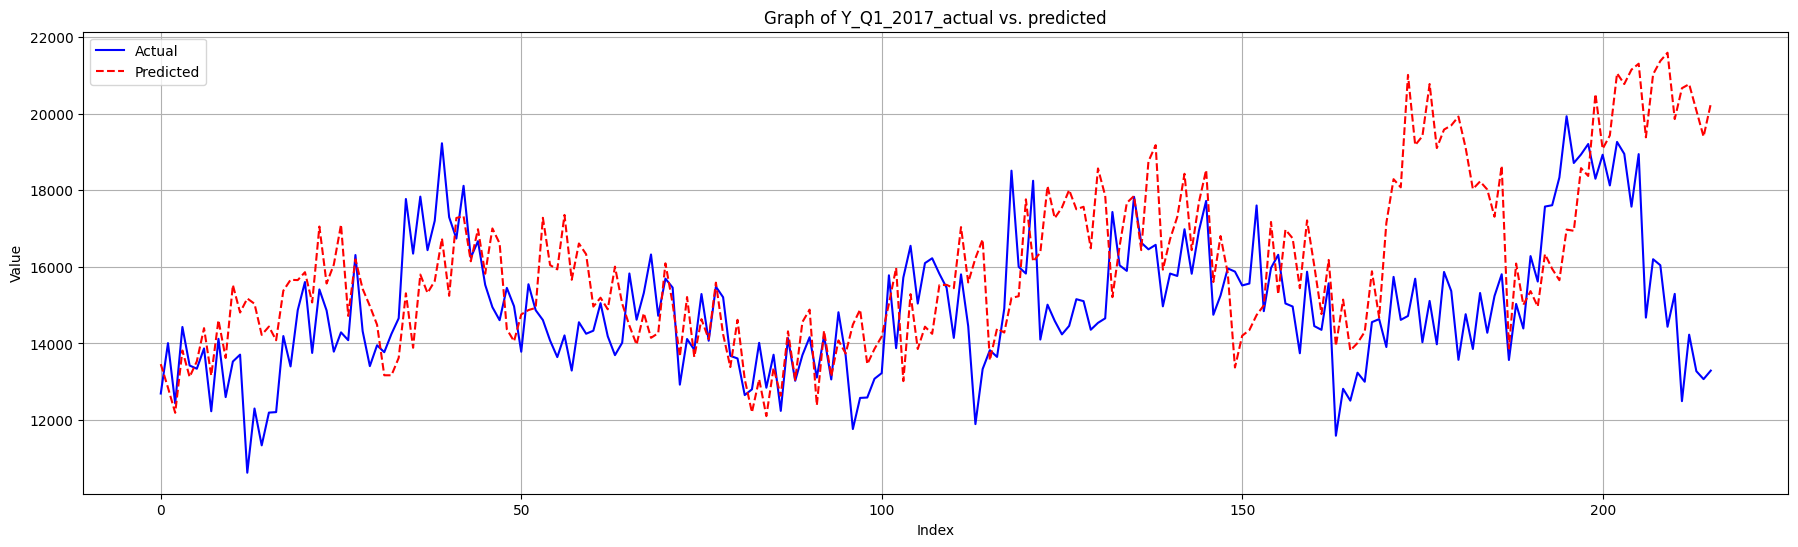

In [213]:
# Graph prediction of 2017 Q1 SMA

# Plotting
plt.figure(figsize=(22, 6))  # Here, the width is set to 12 inches and height is set to 6 inches. Adjust as needed.

plt.plot(new_Y_Q1_2017_actual, label='Actual', color='blue')
plt.plot(new_Y, label='Predicted', color='red', linestyle='--')


# Customize the graph
plt.title('Graph of Y_Q1_2017_actual vs. predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.savefig('2017_Q1_prediction vs actual SMA.png') 
plt.show()

In [214]:
# SMA of average Q1 2016 data
new_Y_Q1_2016_actual = np.array([np.mean(Y_Q1_2016_actual[i:i+10]) for i in range(0, len(Y_Q1_2016_actual), 10)])
print('size of SMA 2016 Q1 actual:', new_Y_Q1_2016_actual.size)

size of SMA 2016 Q1 actual: 219


In [215]:
# Test the prediction against actual Q1 2016 data - Support Vector Regression
error = 0
percentage_error = 0
for i in range(0, 216, 1):
    error += abs(new_Y_Q1_2016_actual[i] - Y[i])
    percentage_error += abs(100 * (new_Y_Q1_2016_actual[i] - new_Y[i]) / new_Y_Q1_2016_actual[i])
error /= 216
percentage_error /= 216
print('mean error for SMA 2016 Q1 data:', error)
print('percentage off for SMA 2016 Q1 data:', percentage_error)

mean error for SMA 2016 Q1 data: 1768.2180555555549
percentage off for SMA 2016 Q1 data: 14.772695266851246


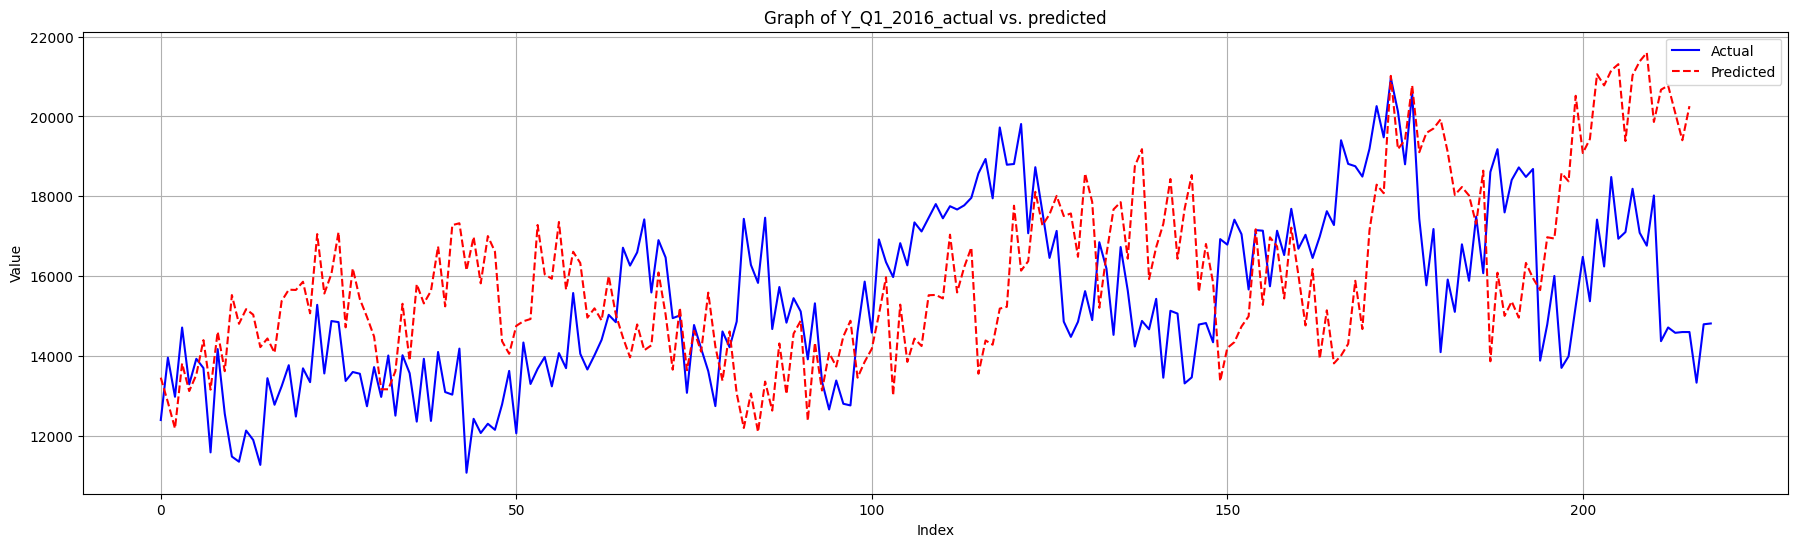

In [216]:
# Graph prediction of 2016 Q1 SMA

# Plotting
plt.figure(figsize=(22, 6))  # Here, the width is set to 12 inches and height is set to 6 inches. Adjust as needed.

plt.plot(new_Y_Q1_2016_actual, label='Actual', color='blue')
plt.plot(new_Y, label='Predicted', color='red', linestyle='--')


# Customize the graph
plt.title('Graph of Y_Q1_2016_actual vs. predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.savefig('2016_Q1_prediction vs actual SMA.png') 
plt.show()

In [217]:
# Compare with actual data 2015 Q1
# Extract the Y values and format it as a numpy array

# Define the path to your CSV file
file_path = "../input/hourly-energy-consumption/AEP_hourly.csv"

# List to store extracted numbers
numbers = []

# Read the file line by line
with open(file_path, 'r') as f:
    for idx, line in enumerate(f, start=1):  # idx will keep track of line number, starting from 1
        if 96437 <= idx <= 98595:  # Q1 2015 Data
            # Split the line by comma and take the second part, then convert to float
            number = float(line.split(",")[1])
            numbers.append(number)

# Convert list to numpy array
Y_Q1_2015_actual = np.array(numbers)

print('size:', Y_Q1_2015_actual.size)

size: 2159


In [218]:
# SMA of average Q1 2015 data
new_Y_Q1_2015_actual = np.array([np.mean(Y_Q1_2015_actual[i:i+10]) for i in range(0, len(Y_Q1_2015_actual), 10)])
print('size of SMA 2015 Q1 actual:', new_Y_Q1_2015_actual.size)

size of SMA 2015 Q1 actual: 216


In [219]:
# Test the prediction against actual Q1 2015 data - Support Vector Regression
error = 0
percentage_error = 0
for i in range(0, 216, 1):
    error += abs(new_Y_Q1_2015_actual[i] - Y[i])
    percentage_error += abs(100 * (new_Y_Q1_2015_actual[i] - new_Y[i]) / new_Y_Q1_2015_actual[i])
error /= 216
percentage_error /= 216
print('mean error for SMA 2015 Q1 data:', error)
print('percentage off for SMA 2015 Q1 data:', percentage_error)

mean error for SMA 2015 Q1 data: 2660.039094650205
percentage off for SMA 2015 Q1 data: 15.153523332009357


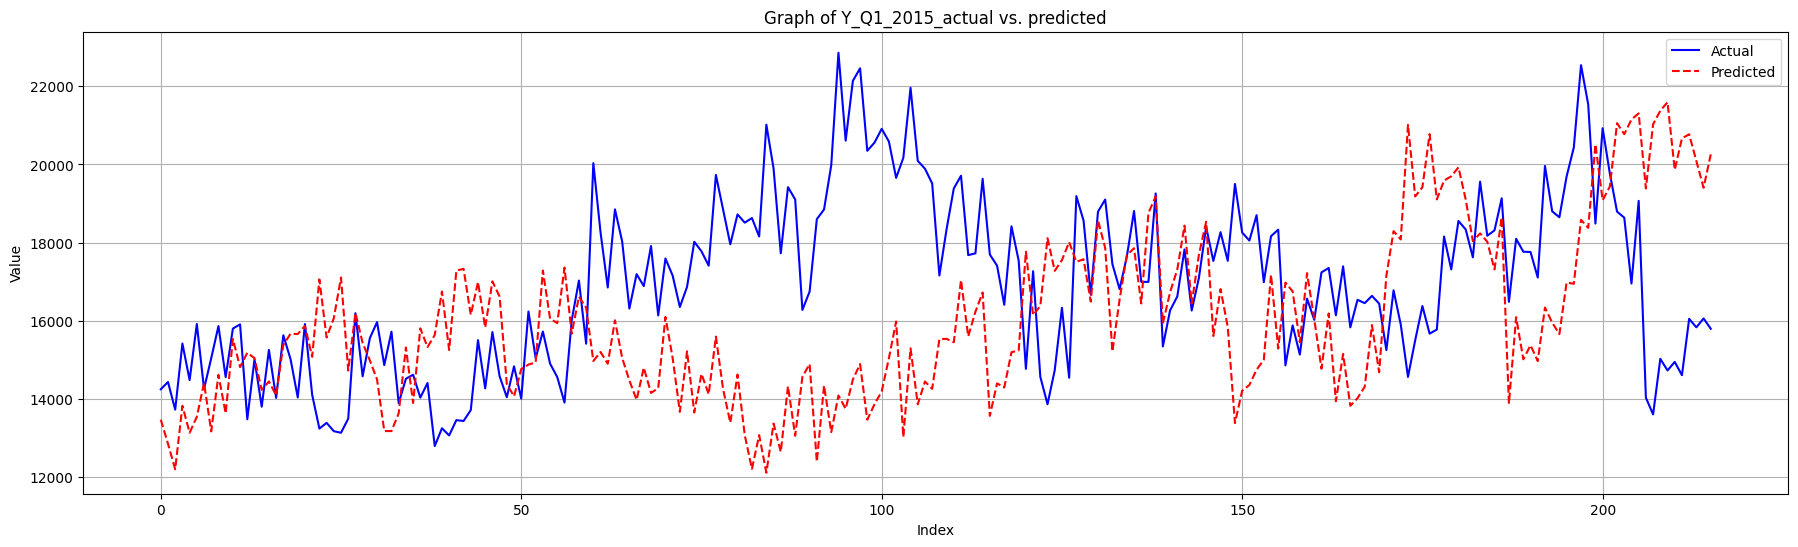

In [220]:
# Graph prediction of 2015 Q1 SMA

# Plotting
plt.figure(figsize=(22, 6))  # Here, the width is set to 12 inches and height is set to 6 inches. Adjust as needed.

plt.plot(new_Y_Q1_2015_actual, label='Actual', color='blue')
plt.plot(new_Y, label='Predicted', color='red', linestyle='--')


# Customize the graph
plt.title('Graph of Y_Q1_2015_actual vs. predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.savefig('2015_Q1_prediction vs actual SMA.png') 
plt.show()

In [221]:
# Find avg, mean, median, variance of data of a quarter
# mean
Y_Q1_2018_mean = np.mean(Y)
print('The average for Q1, 2018 is:', Y_Q1_2018_mean)

Y_Q1_2017_mean = np.mean(Y_Q1_2017_actual)
print('The average for Q1, 2017 is:', Y_Q1_2017_mean)

Y_Q1_2016_mean = np.mean(Y_Q1_2016_actual)
print('The average for Q1, 2016 is:', Y_Q1_2016_mean)

Y_Q1_2015_mean = np.mean(Y_Q1_2015_actual)
print('The average for Q1, 2015 is:', Y_Q1_2015_mean)

print('')

#standard deviation 
Y_Q1_2018_std = np.std(Y)
print('The sd for Q1, 2018 is:', Y_Q1_2018_std)

Y_Q1_2017_std = np.std(Y_Q1_2017_actual)
print('The sd for Q1, 2017 is:', Y_Q1_2017_std)

Y_Q1_2016_std = np.std(Y_Q1_2016_actual)
print('The sd for Q1, 2016 is:', Y_Q1_2016_std)

Y_Q1_2015_std = np.std(Y_Q1_2015_actual)
print('The sd for Q1, 2015 is:', Y_Q1_2015_std)

print('')

#variance
Y_Q1_2018_var = np.var(Y)
print('The var for Q1, 2018 is:', Y_Q1_2018_var)

Y_Q1_2017_var = np.var(Y_Q1_2017_actual)
print('The var for Q1, 2017 is:', Y_Q1_2017_var)

Y_Q1_2016_var = np.var(Y_Q1_2016_actual)
print('The var for Q1, 2016 is:', Y_Q1_2016_var)

Y_Q1_2015_var = np.var(Y_Q1_2015_actual)
print('The var for Q1, 2015 is:', Y_Q1_2015_var)

The average for Q1, 2018 is: 16015.984251968504
The average for Q1, 2017 is: 14943.607688744789
The average for Q1, 2016 is: 15438.196518552451
The average for Q1, 2015 is: 16922.577119036592

The sd for Q1, 2018 is: 2353.5655246391725
The sd for Q1, 2017 is: 1979.4525776198893
The sd for Q1, 2016 is: 2353.5575131688734
The sd for Q1, 2015 is: 2434.947269669737

The var for Q1, 2018 is: 5539270.678770063
The var for Q1, 2017 is: 3918232.5070460243
The var for Q1, 2016 is: 5539232.967793651
The var for Q1, 2015 is: 5928968.206072107


In [222]:
# Attempt to improve accuracy by using 24-hour SMA
new_24_Y = np.array([np.mean(Y[i:i+24]) for i in range(0, len(Y), 24)])
print('size of 24-hour SMA:', new_24_Y.size)

size of 24-hour SMA: 90


In [223]:
# 2D input
X = np.arange(1, 91, dtype=int).reshape(-1, 1)
print('size:', X.size)
# print(X)

size: 90


In [224]:
# Regression using 24-hour SMA
regr = svm.SVR()
regr.fit(X, new_24_Y)

SVR()

In [225]:
# Change 2017 Q1 data to 24-hour SMA
new_24_Y_Q1_2017_actual = np.array([np.mean(Y_Q1_2017_actual[i:i+24]) for i in range(0, len(Y_Q1_2017_actual), 24)])
print('size of 24-hour SMA 2017 Q1:', new_24_Y_Q1_2017_actual.size)

size of 24-hour SMA 2017 Q1: 90


In [226]:
# Test the prediction against actual Q1 2017 data - Support Vector Regression
error = 0
percentage_error = 0
for i in range(0, 90, 1):
    error += abs(new_24_Y_Q1_2017_actual[i] - new_24_Y[i])
    percentage_error += abs(100 * (new_24_Y_Q1_2017_actual[i] - new_24_Y[i]) / new_24_Y_Q1_2017_actual[i])
error /= 90
percentage_error /= 90
print('mean error for SMA 2017 Q1 data:', error)
print('percentage off for SMA 2017 Q1 data:', percentage_error)

mean error for SMA 2017 Q1 data: 1737.0901570048309
percentage off for SMA 2017 Q1 data: 11.878932447371376


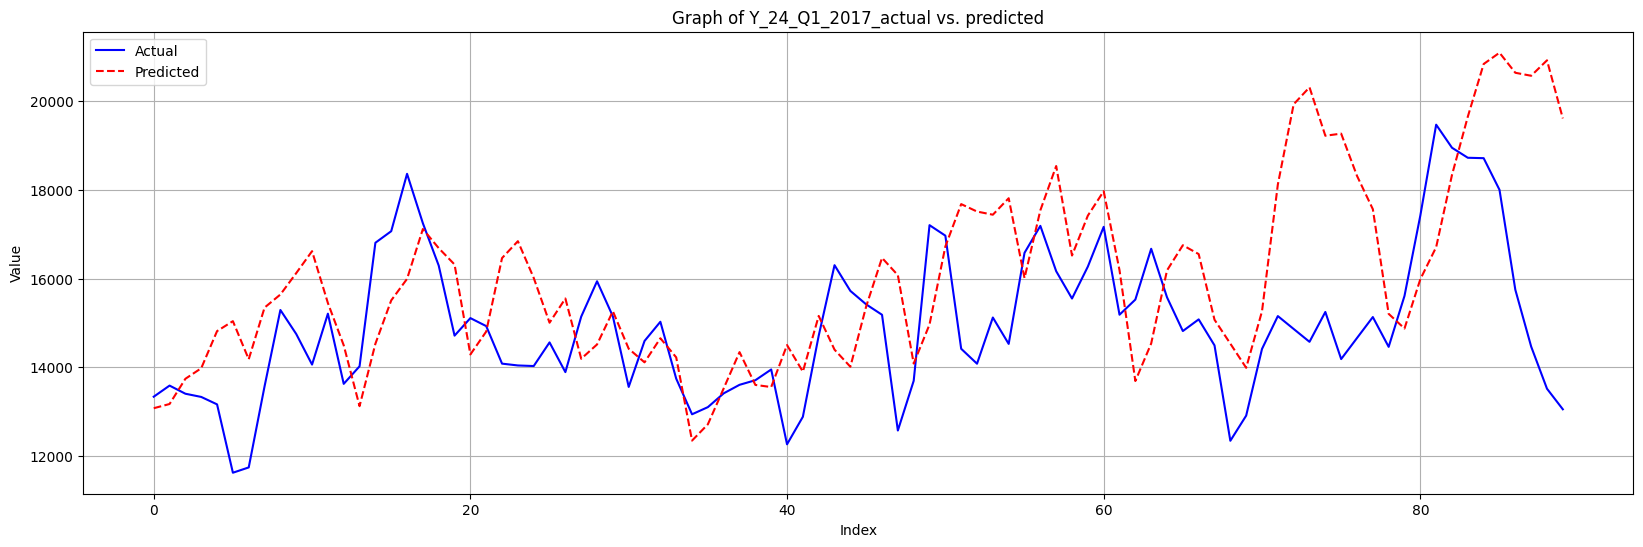

In [227]:
# Graph prediction of 2017 Q1 24h SMA

# Plotting
plt.figure(figsize=(20, 6))  # Here, the width is set to 12 inches and height is set to 6 inches. Adjust as needed.

plt.plot(new_24_Y_Q1_2017_actual, label='Actual', color='blue')
plt.plot(new_24_Y, label='Predicted', color='red', linestyle='--')


# Customize the graph
plt.title('Graph of Y_24_Q1_2017_actual vs. predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.savefig('2017_Q1_prediction vs actual SMA_24h.png') 
plt.show()

In [228]:
# Change 2016 Q1 data to 24-hour SMA
new_24_Y_Q1_2016_actual = np.array([np.mean(Y_Q1_2016_actual[i:i+24]) for i in range(0, len(Y_Q1_2016_actual), 24)])
print('size of 24-hour SMA 2016 Q1:', new_24_Y_Q1_2016_actual.size)

size of 24-hour SMA 2016 Q1: 91


In [229]:
# Test the prediction against actual Q1 2016 data - Support Vector Regression
error = 0
percentage_error = 0
for i in range(0, 90, 1):
    error += abs(new_24_Y_Q1_2016_actual[i] - new_24_Y[i])
    percentage_error += abs(100 * (new_24_Y_Q1_2016_actual[i] - new_24_Y[i]) / new_24_Y_Q1_2016_actual[i])
error /= 90
percentage_error /= 90
print('mean error for SMA 2016 Q1 data:', error)
print('percentage off for SMA 2016 Q1 data:', percentage_error)

mean error for SMA 2016 Q1 data: 2214.7365740740747
percentage off for SMA 2016 Q1 data: 14.57159557395536


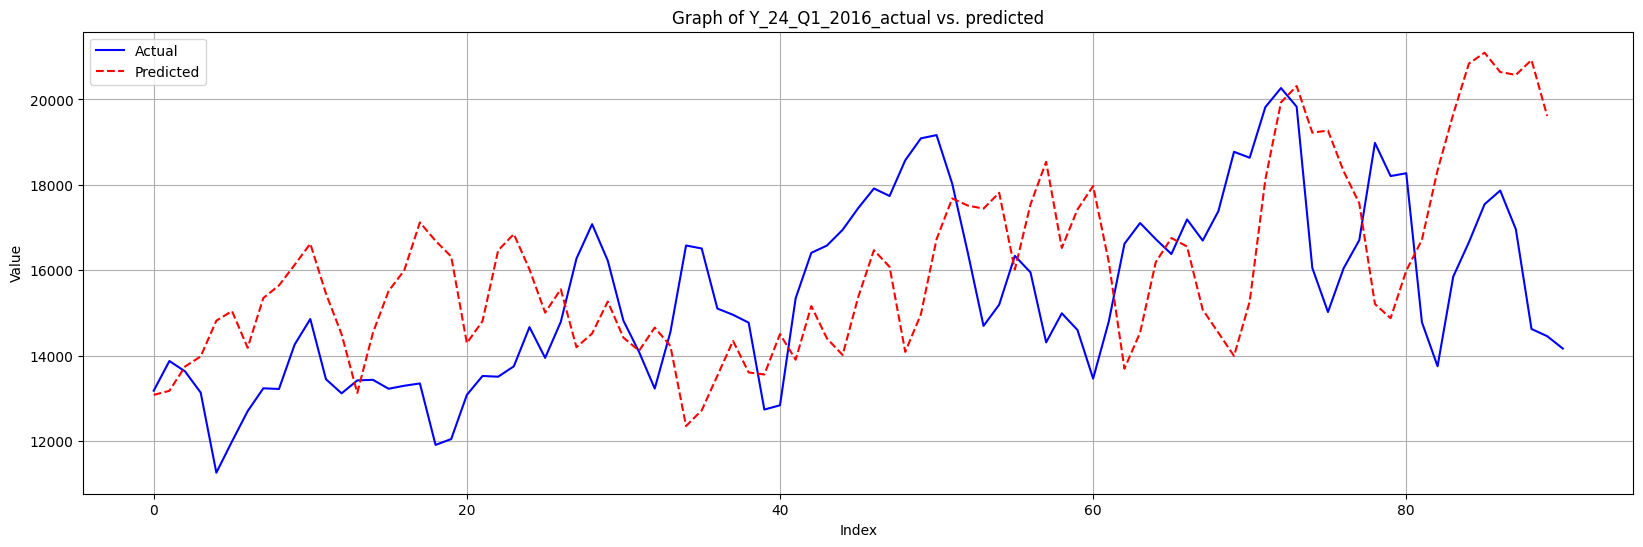

In [230]:
# Graph prediction of 2016 Q1 24h SMA

# Plotting
plt.figure(figsize=(20, 6))  # Here, the width is set to 12 inches and height is set to 6 inches. Adjust as needed.

plt.plot(new_24_Y_Q1_2016_actual, label='Actual', color='blue')
plt.plot(new_24_Y, label='Predicted', color='red', linestyle='--')


# Customize the graph
plt.title('Graph of Y_24_Q1_2016_actual vs. predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.savefig('2016_Q1_prediction vs actual SMA_24h.png') 
plt.show()

In [231]:
# 3-year average

temp = []
for i in range(0, 90):
    cur = (new_24_Y[i] + new_24_Y_Q1_2016_actual[i] + new_24_Y_Q1_2016_actual[i]) / 3
    temp.append(cur)
three_year_average = np.array(temp)

In [232]:
# 2D input
X = np.arange(1, 91, dtype=int).reshape(-1, 1)
print('size:', X.size)
# print(X)

size: 90


In [233]:
# Regression using 24-hour SMA
regr = svm.SVR()
regr.fit(X, three_year_average)

SVR()

In [234]:
# 24h SMA of average Q1 2015 data
new_24_Y_Q1_2015_actual = np.array([np.mean(Y_Q1_2015_actual[i:i+24]) for i in range(0, len(Y_Q1_2015_actual), 24)])
print('size of 24h SMA 2015 Q1 actual:', new_24_Y_Q1_2015_actual.size)

size of 24h SMA 2015 Q1 actual: 90


In [235]:
# Test the prediction against actual Q1 2015 data - Support Vector Regression 3y avg
error = 0
percentage_error = 0
for i in range(0, 90, 1):
    error += abs(new_24_Y_Q1_2015_actual[i] - Y[i])
    percentage_error += abs(100 * (new_24_Y_Q1_2015_actual[i] - three_year_average[i]) / new_24_Y_Q1_2015_actual[i])
error /= 90
percentage_error /= 90
print('mean error for SMA 2015 Q1 data:', error)
print('percentage off for SMA 2015 Q1 data:', percentage_error)

mean error for SMA 2015 Q1 data: 3527.6626207729464
percentage off for SMA 2015 Q1 data: 12.687267870169253


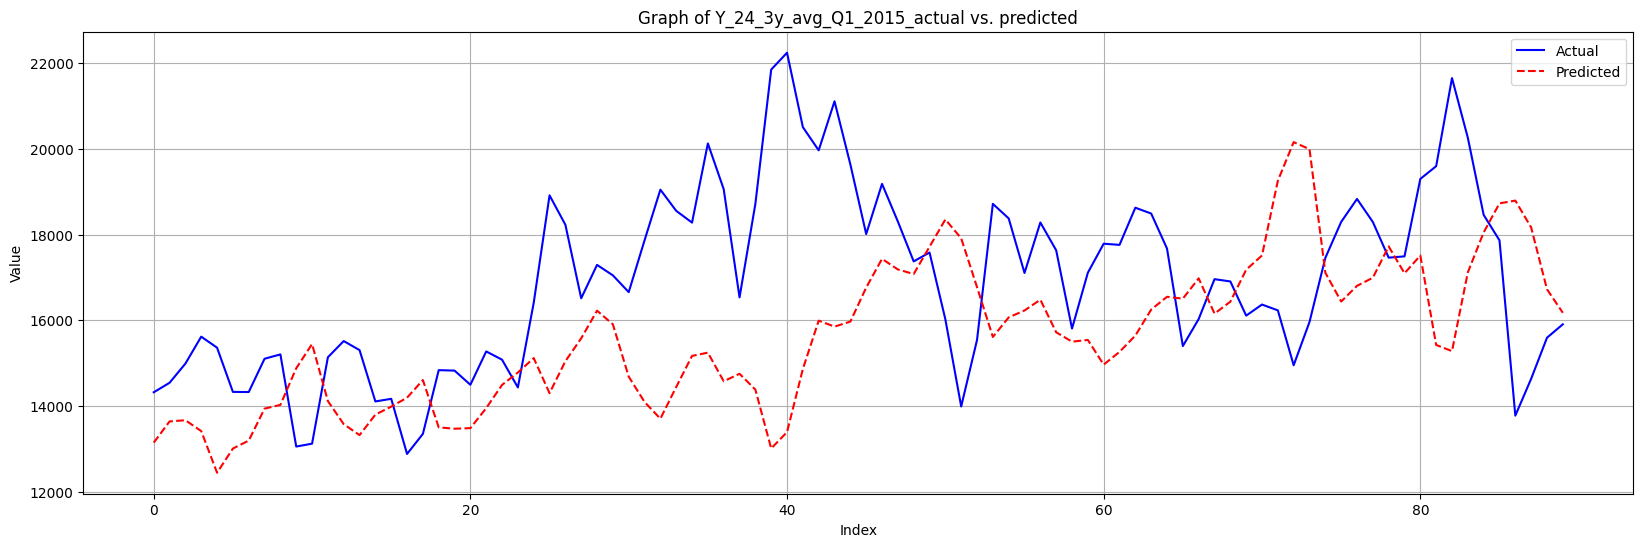

In [236]:
# Graph prediction of 2015 Q1 24h SMA 3-year average

# Plotting
plt.figure(figsize=(20, 6))  # Here, the width is set to 12 inches and height is set to 6 inches. Adjust as needed.

plt.plot(new_24_Y_Q1_2015_actual, label='Actual', color='blue')
plt.plot(three_year_average, label='Predicted', color='red', linestyle='--')


# Customize the graph
plt.title('Graph of Y_24_3y_avg_Q1_2015_actual vs. predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.savefig('2016_Q1_prediction vs actual SMA_24h_3y.png') 
plt.show()

In [237]:
# Initializing an empty list
data = []

# Looping through years 2018, 2017, 2016
for year in [2018, 2017, 2016]:
    for i in range(1, 91):  # Looping through numbers 1 to 90
        data.append([year, i])

data.append([year, 91])
# Converting the list to a numpy array
X_2d = np.array(data)

# print(X_2d.size)
print(X_2d)

[[2018    1]
 [2018    2]
 [2018    3]
 [2018    4]
 [2018    5]
 [2018    6]
 [2018    7]
 [2018    8]
 [2018    9]
 [2018   10]
 [2018   11]
 [2018   12]
 [2018   13]
 [2018   14]
 [2018   15]
 [2018   16]
 [2018   17]
 [2018   18]
 [2018   19]
 [2018   20]
 [2018   21]
 [2018   22]
 [2018   23]
 [2018   24]
 [2018   25]
 [2018   26]
 [2018   27]
 [2018   28]
 [2018   29]
 [2018   30]
 [2018   31]
 [2018   32]
 [2018   33]
 [2018   34]
 [2018   35]
 [2018   36]
 [2018   37]
 [2018   38]
 [2018   39]
 [2018   40]
 [2018   41]
 [2018   42]
 [2018   43]
 [2018   44]
 [2018   45]
 [2018   46]
 [2018   47]
 [2018   48]
 [2018   49]
 [2018   50]
 [2018   51]
 [2018   52]
 [2018   53]
 [2018   54]
 [2018   55]
 [2018   56]
 [2018   57]
 [2018   58]
 [2018   59]
 [2018   60]
 [2018   61]
 [2018   62]
 [2018   63]
 [2018   64]
 [2018   65]
 [2018   66]
 [2018   67]
 [2018   68]
 [2018   69]
 [2018   70]
 [2018   71]
 [2018   72]
 [2018   73]
 [2018   74]
 [2018   75]
 [2018   76]
 [2018   77]

In [238]:
Y_concatenated_array = np.concatenate((new_24_Y, new_24_Y_Q1_2017_actual, new_24_Y_Q1_2016_actual))

# print(Y_concatenated_array)

In [239]:
# Regression using 24-hour SMA
regr = RandomForestRegressor(n_estimators=100)
regr.fit(X_2d, Y_concatenated_array)

RandomForestRegressor()

In [240]:
X_to_predict = np.array([[2015, i] for i in range(1, 91)])
# print(X_to_predict)
predictions_2015 = regr.predict(X_to_predict)
print(predictions_2015)

[13310.43291667 13704.51791667 13625.41       13247.38958333
 12037.60083333 12070.50375    12526.43291667 13271.89083333
 13483.29875    14056.92458333 14553.56       13813.51708333
 13242.48166667 13349.51125    13425.04916667 13345.58208333
 13368.67375    13241.13791667 12365.09458333 12111.62875
 12848.67125    13391.42083333 13565.45541667 13804.69
 14407.67875    14149.54708333 14690.42666667 15839.06166667
 16621.86916667 16165.11708333 14792.99333333 14270.315
 13649.56625    14472.18166667 15888.155      16141.21333333
 15384.25041667 15002.10958333 14645.7175     13354.27625
 13034.35375    14877.53166667 16004.36833333 16511.525
 16796.93416667 17283.58375    17716.68416667 17576.75875
 18208.78625    18930.05708333 19011.3375     17979.32333333
 16634.01458333 15295.9775     15343.64833333 15989.91583333
 15870.18041667 14834.74875    14801.67333333 14650.75583333
 14208.59916667 14896.44708333 16016.8075     16790.29458333
 16751.63208333 16497.71291667 16929.25083333 168

In [241]:
# Test the prediction against actual Q1 2015 data - Support Vector Regression 3y avg 2D input
error = 0
percentage_error = 0
for i in range(0, 90, 1):
    error += abs(new_24_Y_Q1_2015_actual[i] - predictions_2015[i])
    percentage_error += abs(100 * (new_24_Y_Q1_2015_actual[i] - predictions_2015[i]) / new_24_Y_Q1_2015_actual[i])
error /= 90
percentage_error /= 90
print('mean error for SMA 2015 Q1 data:', error)
print('percentage off for SMA 2015 Q1 data:', percentage_error)

mean error for SMA 2015 Q1 data: 2343.7734871175558
percentage off for SMA 2015 Q1 data: 13.383342301982369


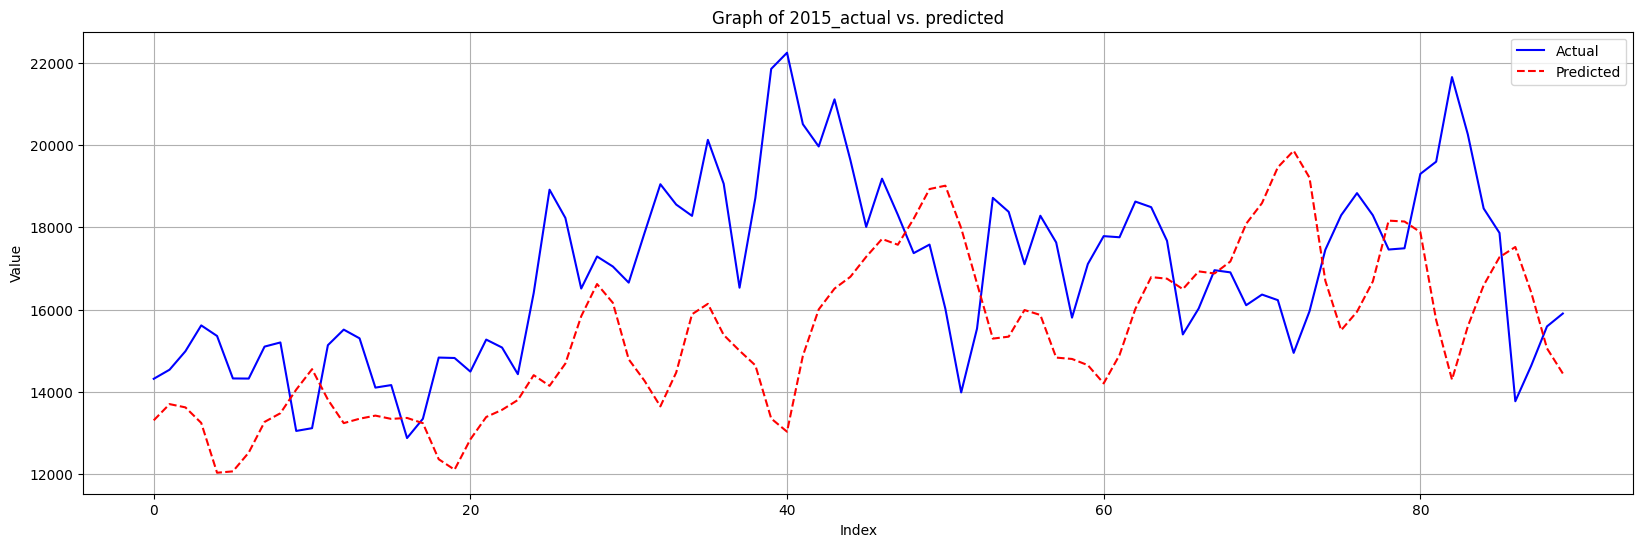

In [242]:
# Graph 2015 prediction
# Graph prediction of 2015 Q1 24h SMA 3-year average

# Plotting
plt.figure(figsize=(20, 6))  # Here, the width is set to 12 inches and height is set to 6 inches. Adjust as needed.

plt.plot(new_24_Y_Q1_2015_actual, label='Actual', color='blue')
plt.plot(predictions_2015, label='Predicted', color='red', linestyle='--')


# Customize the graph
plt.title('Graph of 2015_actual vs. predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.savefig('2015_Q1_prediction vs actual SMA_24h_3y_2d.png') 
plt.show()

In [243]:
X_to_predict = np.array([[2014, i] for i in range(1, 91)])
predictions_2014 = regr.predict(X_to_predict)
print(predictions_2014.size)

90


In [244]:
# Actual data for 2014
# Extract the Y values and format it as a numpy array

# Define the path to your CSV file
file_path = "../input/hourly-energy-consumption/AEP_hourly.csv"

# List to store extracted numbers
numbers = []

# Read the file line by line
with open(file_path, 'r') as f:
    for idx, line in enumerate(f, start=1):  # idx will keep track of line number, starting from 1
        if 87678 <= idx <= 89836:  # Q1 2014 Data
            # Split the line by comma and take the second part, then convert to float
            number = float(line.split(",")[1])
            numbers.append(number)

# Convert list to numpy array
Y_Q1_2014_actual = np.array(numbers)

print('size:', Y_Q1_2014_actual.size)

size: 2159


In [245]:
# Data processing for 2014 actual data - SMA 24h
new_24_Y_Q1_2014_actual = np.array([np.mean(Y_Q1_2014_actual[i:i+24]) for i in range(0, len(Y_Q1_2014_actual), 24)])
print('size of 24h SMA 2014 Q1 actual:', new_24_Y_Q1_2014_actual.size)

size of 24h SMA 2014 Q1 actual: 90


In [246]:
# Test the prediction against actual Q1 2014 data - Support Vector Regression 3y avg 2D input
error = 0
percentage_error = 0
for i in range(0, 90, 1):
    error += abs(new_24_Y_Q1_2014_actual[i] - predictions_2014[i])
    percentage_error += abs(100 * (new_24_Y_Q1_2014_actual[i] - predictions_2014[i]) / new_24_Y_Q1_2014_actual[i])
error /= 90
percentage_error /= 90
print('mean error for SMA 2014 Q1 data:', error)
print('percentage off for SMA 2014 Q1 data:', percentage_error)

mean error for SMA 2014 Q1 data: 2268.2160471014517
percentage off for SMA 2014 Q1 data: 12.700622892594298


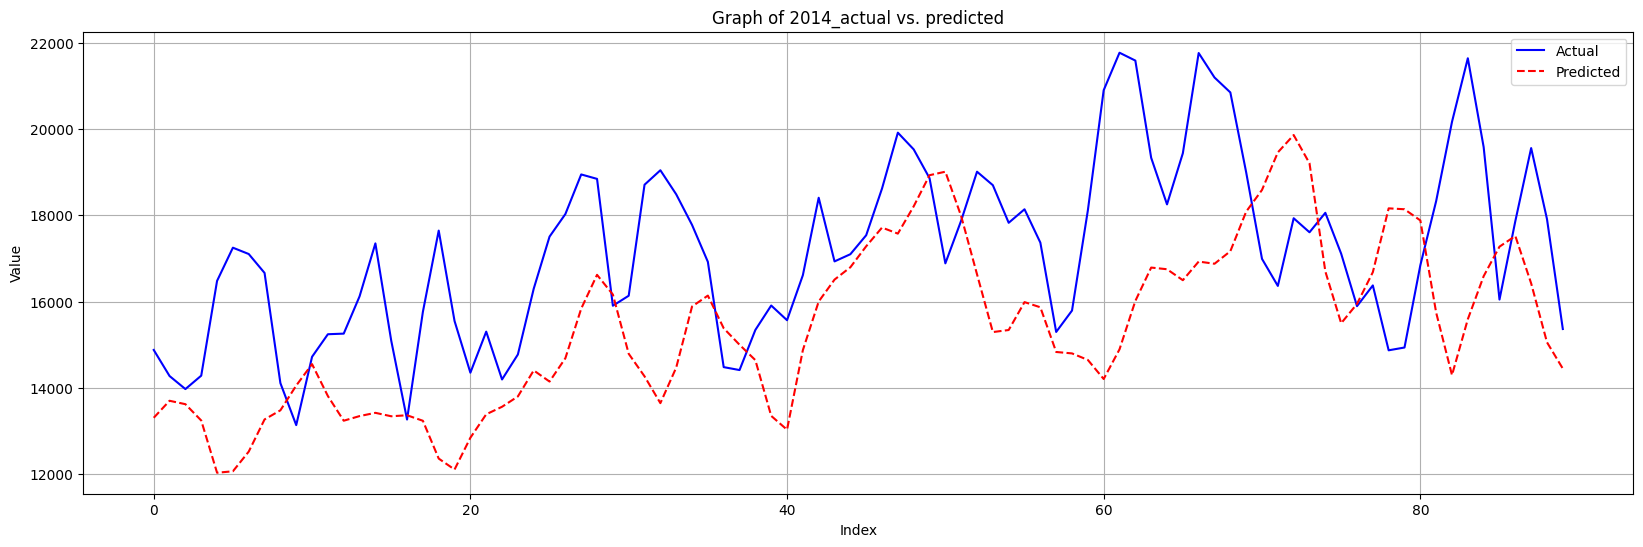

In [247]:
# Graph 2015 prediction
# Graph prediction of 2014 Q1 24h SMA 3-year average

# Plotting
plt.figure(figsize=(20, 6))  # Here, the width is set to 12 inches and height is set to 6 inches. Adjust as needed.

plt.plot(new_24_Y_Q1_2014_actual, label='Actual', color='blue')
plt.plot(predictions_2014, label='Predicted', color='red', linestyle='--')


# Customize the graph
plt.title('Graph of 2014_actual vs. predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.savefig('2014_Q1_prediction vs actual SMA_24h_3y_2d.png') 
plt.show()

In [304]:
# 
df = pd.read_csv("../input/hourly-energy-consumption/AEP_hourly.csv", skiprows=range(1, 2), nrows=40000, parse_dates=['Datetime'])

df['year'] = df['Datetime'].dt.year
df['month'] = df['Datetime'].dt.month
df['day'] = df['Datetime'].dt.day
df['hour'] = df['Datetime'].dt.hour

X_4d = df[['year', 'month', 'day', 'hour']].values

print(X_4d.size)


160000


In [305]:
# Extract the Y values and format it as a numpy array - 2018 Jan

# Define the path to your CSV file
file_path = "../input/hourly-energy-consumption/AEP_hourly.csv"

# List to store extracted numbers
numbers = []

# Read the file line by line
with open(file_path, 'r') as f:
    for idx, line in enumerate(f, start=1):  # idx will keep track of line number, starting from 1
        if 2 <= idx <= 40001:  # Check if the line number is between 1000 and 2000
            # Split the line by comma and take the second part, then convert to float
            number = float(line.split(",")[1])
            numbers.append(number)

# Convert list to numpy array
Y = np.array(numbers)

print('size:', Y.size)

size: 40000


In [306]:
# Regression using 24-hour SMA
regr = RandomForestRegressor(n_estimators=300)
regr.fit(X_4d, Y)

RandomForestRegressor(n_estimators=300)

In [307]:
start_time = datetime(2007, 3, 15, 1)
end_time = datetime(2007, 3, 31, 23)

# Calculate the number of hours between the start and end time
num_hours = int((end_time - start_time).total_seconds() / 3600) + 1

# Initialize a 2D array with shape [number_of_hours][4]
data = np.zeros((num_hours, 4), dtype=int)

# Populate the array
current_time = start_time
for idx in range(num_hours):
    data[idx] = [current_time.year, current_time.month, current_time.day, current_time.hour]
    current_time += timedelta(hours=1)

print(data.size)

1628


In [308]:
predictions_2007 = regr.predict(data)
# print(predictions_2007)
print(predictions_2007.size)

407


In [300]:
df = pd.read_csv('/kaggle/input/actual-results-2007/data_preprocessing - Sheet1.csv')
# Convert the DataFrame to a numpy array
data_array = df.to_numpy()

# Extracting the first column (only numbers) and keeping the first 407 values
actual_2007 = data_array[:407, 0]

# Removing nan values from the 1D array
actual_2007 = actual_2007[~pd.isnull(actual_2007)]
print(actual_2007.size)

407


In [309]:
# Calculate MSE
MSE = 0;
for i in range(0, 407):
    MSE += (predictions_2007[i] - actual_2007[i]) * (predictions_2007[i] - actual_2007[i])
MSE /= 407
print('MSE:', MSE)

MSE: 1108202.7364251972


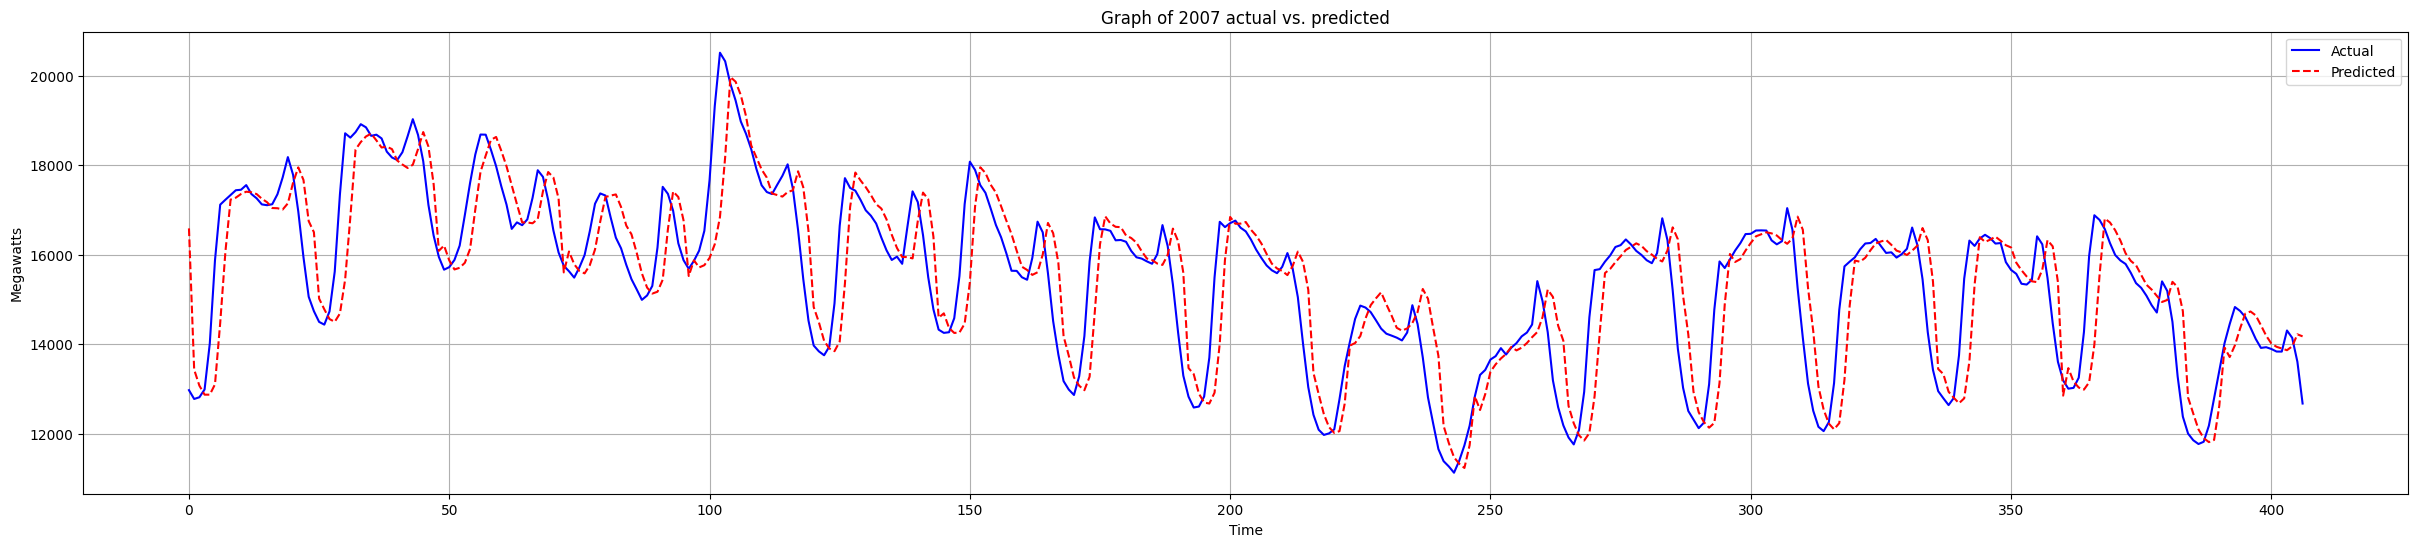

In [310]:
# Graph 2007 prediction
# Graph prediction of 2014 Q1 24h SMA 3-year average

# Plotting
plt.figure(figsize=(30, 6))  # Here, the width is set to 12 inches and height is set to 6 inches. Adjust as needed.

plt.plot(actual_2007, label='Actual', color='blue')
plt.plot(predictions_2007, label='Predicted', color='red', linestyle='--')


# Customize the graph
plt.title('Graph of 2007 actual vs. predicted')
plt.xlabel('Time')
plt.ylabel('Megawatts')
plt.legend()
plt.grid(True)
plt.savefig('2007_prediction vs actual.png') 
plt.show()